# PIC 16A Final Project
Members:
* Ellen Chen
* Sasha Avakyan
* Michael Yao

## Group Contribution Statement

All three of us worked on data acquisition and cleaning section. Ellen led Figure 1 and the Logistic Regression Model. Sasha led Figure 2 and the KMNeighbors Classifier Model. Micheal led Figure 3 and both the Random Forrest and Neural Networks Model. Each wrote the explanation for their respective model. The conclusion discussion was written by all.

## Data Cleaning

In [7]:
# importing penguins dataset
import pandas as pd
import numpy as np
import urllib
from matplotlib import pyplot as plt

url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


---------------------------------------------------------------------

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing set
penguins_train, penguins_test = train_test_split(penguins, test_size = 0.3, random_state=40)

def clean_data(df):
    ''' 
    Cleans the inputted dataframe by shortening the species name based on the first word 
    of the species (before any space) and drops the not needed colums: 'studyName', 'Region', 'Sample Number', 'Stage', 
       'Individual ID', 'Clutch Completion', 'Date Egg', and 'Comments'

    Parameters: 
    df (pandas DataFrame): This is the dataframe with the raw data

    Returns: 
    pandas.DataFrame: 
    '''
    # Shorten species name
    df["Species"] = df["Species"].str.split().str.get(0)    #shorten species name
    
    # Drop unnecessary columns
    df_new = df.drop(['studyName', 'Region', 'Sample Number', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Comments'], axis=1)

    return df_new

# Clean the train and test sets
cleaned_penguins_train = clean_data(penguins_train)
cleaned_penguins_test = clean_data(penguins_test)

cleaned_penguins_train

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
112,Adelie,Biscoe,39.7,17.7,193.0,3200.0,FEMALE,9.02657,-26.06203
85,Adelie,Dream,41.3,20.3,194.0,3550.0,MALE,9.14863,-26.09635
16,Adelie,Torgersen,38.7,19.0,195.0,3450.0,FEMALE,9.18528,-25.06691
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,FEMALE,8.41837,-26.54718
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE,8.55583,-25.22588
...,...,...,...,...,...,...,...,...,...
306,Gentoo,Biscoe,43.4,14.4,218.0,4600.0,FEMALE,8.23468,-26.18599
165,Chinstrap,Dream,52.0,18.1,201.0,4050.0,MALE,9.02330,-24.38933
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958
219,Chinstrap,Dream,50.2,18.7,198.0,3775.0,FEMALE,9.39305,-24.25255


-------------------------------------------------------------

## Data Exploration

**Figure 1**

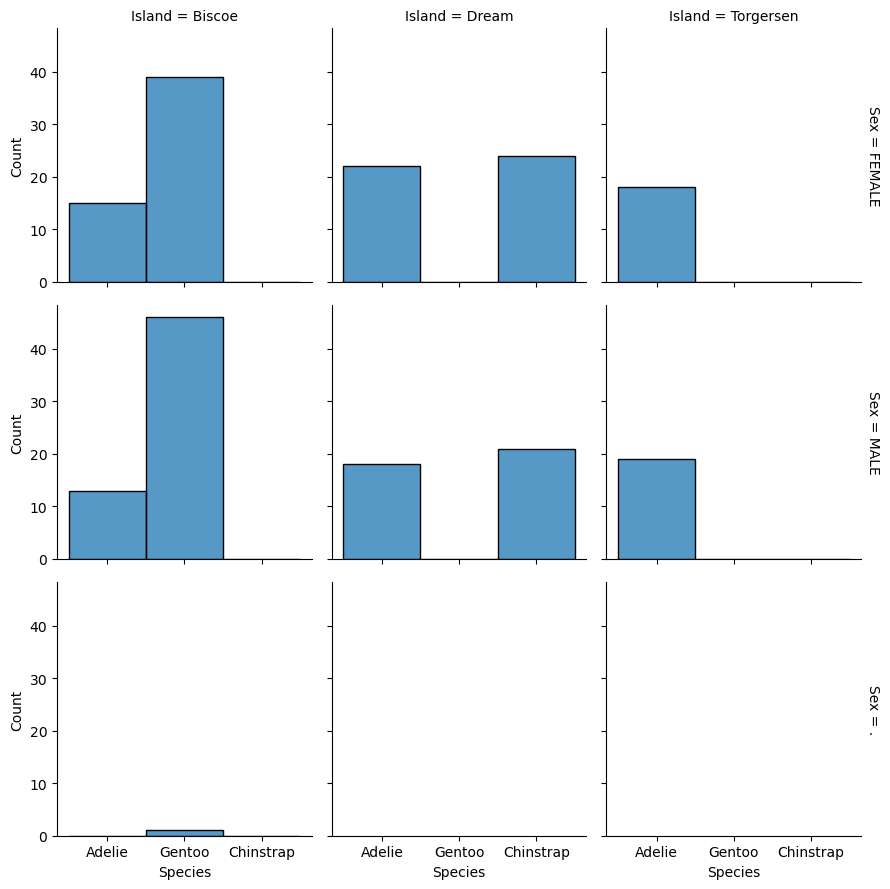

In [13]:
import seaborn as sns

# Creates density plot of islands separated by species and sex
sns.displot(
    cleaned_penguins_train.dropna(subset = ['Sex']), x="Species", col="Island", row="Sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

Discussion:
* We can see that one island is really indicative of species:
    * If island is *Torgersen*, species must be *Adelie*
* The other two island can also be very helpful in narrowing down options
    * If island is *Dream*, species must not be *Gentoo*
    * If island is *Biscoe*, species must not be *Chinstrap*

**Figure 2**

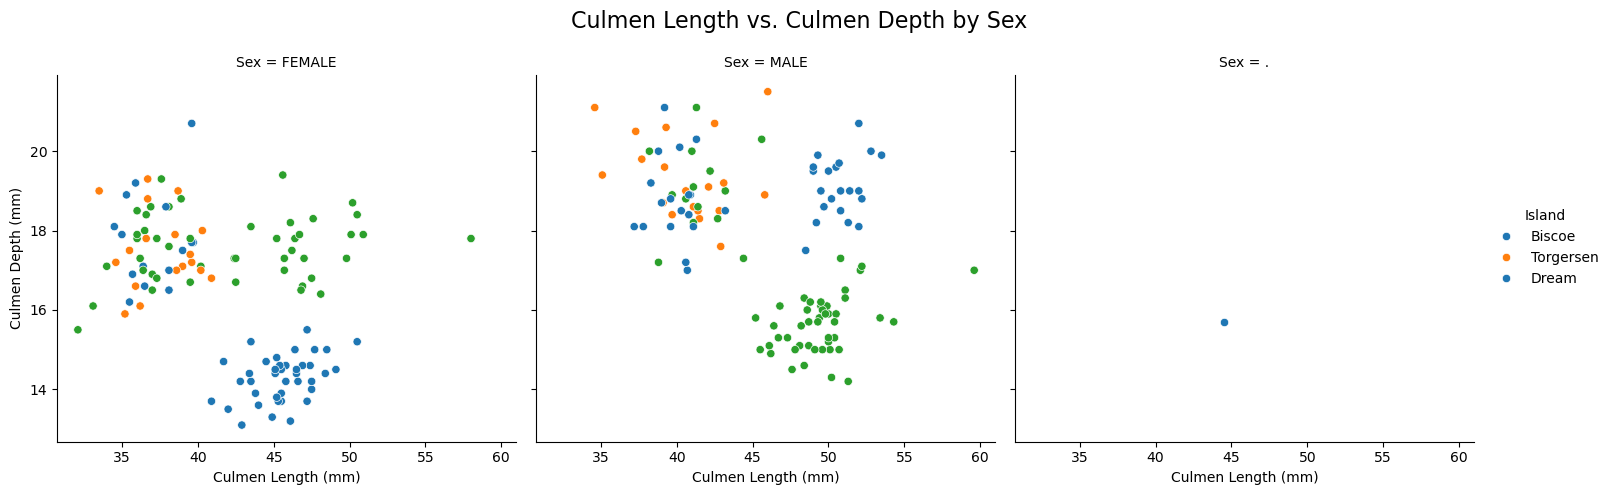

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_penguins_by_sex(df):
    ''' 
    Plots a scatterplot of culmen length vs depth for penguins 
    grouped by sex using seabird’s ‘FacetGrid’ for each sex category plotting

    Parameters: 
    - df: pandas dataframe
    '''
    g = sns.FacetGrid(data=df, col="Sex", sharex=True, height=5, aspect=1.0)
    g.map_dataframe(
        sns.scatterplot, x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Island"
    )
    g.set_axis_labels("Culmen Length (mm)", "Culmen Depth (mm)")
    g.add_legend(title="Island")
    g.fig.subplots_adjust(top=0.85)  
    g.fig.suptitle("Culmen Length vs. Culmen Depth by Sex", fontsize=16) 
    plt.show()

plot_penguins_by_sex(cleaned_penguins_train)
#need to figure out title labels 
#need to write a docstring 
#make the graph cleaner

**Discussion:** According to the left scatterplot, in female penguins, there appears to be some clustering by Torgersen and Dream Island around the 45 bill length. However, there is a cluster of intermixed island populations - Biscoe, Torgersen, and Dream. The same trend applies for male penguins, but more distinct clusters appear for Dream and Biscoe and a cluster of the three intermixed Island populations. 

**Figure 3**

<Figure size 800x600 with 0 Axes>

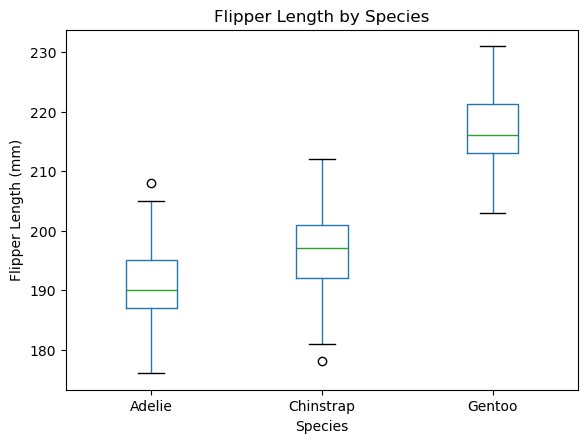

In [19]:
# Boxplot: Flipper Length by Species
plt.figure(figsize=(8, 6))
cleaned_penguins_train.boxplot(column='Flipper Length (mm)', by='Species', grid=False)

plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.title('Flipper Length by Species')
plt.suptitle('') 
plt.show()

**Disucssion:**
By the boxplot, flipper length could the predictive of the penguin's species. Gentoo have the longest average flipper length, followed by the Chinstraps and the adelie. By this observation, the average flipper length is around 190 mm, for chinstrap it is arounf 195 mm, for gentoo it is as high as 218 mm. However, it is important to notice that the flipper length of adeline and chinstrap species are quite close, which suggests that flipper length is not optimal for species prediction.

**Additional Data Exploration**

**Table 1**

In [23]:
cleaned_penguins_train.groupby("Species")[["Culmen Length (mm)", "Culmen Depth (mm)"]].mean().round(2)

,Culmen Length (mm),Culmen Depth (mm)
Species,,
Adelie,38.73,18.32
Chinstrap,48.81,18.30
Gentoo,47.55,15.03


Discussion:
* This shows that while there isn't a significant difference between culmen length of *Gentoo* and *Chinstrap*, there is a **significant difference** between *Adelie* and the other two.
* And while there isn't a significant difference betwen the culmen depth of *Adelie* and *Chinstrap*, there is a **significant difference** between *Gentoo* and the other two

Predictions:
* Given a culmen length <40, likely an **Adelie**. If >40, either Chinstrap or Gentoo.
* Given a culmen depth <15, likely a **Gentoo**. If >15, either Adelie or Chinstrap.

* combined with island, we can figure out the species.

**Table 2**

In [26]:
cleaned_penguins_train.groupby("Species")[["Body Mass (g)", "Flipper Length (mm)"]].mean().round(2)

,Body Mass (g),Flipper Length (mm)
Species,,
Adelie,3683.73,190.55
Chinstrap,3780.56,196.49
Gentoo,5094.60,217.25


Discussion:
* While there isn't a significant difference between the body mass of Adelie and Chinstrap, there is a significant difference between *Gentoo* and the other two.
* While the mean of flipper length of adelie and chinstrap differs by ~5mm, gentoo differs from adelie by ~27mm and from chinstrap by ~22mm.

Predictions:
* If body mass > 4000, likely its Gentoo
* If flipper length >200, likely its Gentoo (not a huge distinction tho)

**Table 3**

In [29]:
cleaned_penguins_train.groupby(["Species", "Island"])[["Flipper Length (mm)", "Culmen Length (mm)"]].mean().round(2)

Flipper Length (mm)  Culmen Length (mm)
Species   Island                                            
Adelie    Biscoe                  190.11               39.06
          Dream                   189.42               38.24
          Torgersen               192.05               39.00
Chinstrap Dream                   196.49               48.81
Gentoo    Biscoe                  217.25               47.55

**Discussion:** This table represents the average flipper length and culmen length, in mm, grouped by species and island. This table demonstrates that flipper length is the largest on average in the Gentoo species of penguin, which are located on Biscoe. A noticed trend in Chinstrap penguins is that Culmen Length is the largest on average compared to other species. This table hints that there are differences in flipper length and culmen length of certain species based on their island location.

**Table 4**

In [32]:
cleaned_penguins_train.groupby(["Species", "Sex"])[["Flipper Length (mm)", "Culmen Length (mm)"]].mean().round(2)

Flipper Length (mm)  Culmen Length (mm)
Species   Sex                                            
Adelie    FEMALE               188.18               37.15
          MALE                 193.10               40.56
Chinstrap FEMALE               192.08               47.16
          MALE                 201.52               50.69
Gentoo    .                    217.00               44.50
          FEMALE               213.00               45.57
          MALE                 220.96               49.39

**Discussion:** This table demonstrates average flipper length and culmen length in species, grouped by sex. This demonstrates that in every species, male penguins have a higher on average flipper length and culmen length in comparison with female counterparts.

---------------------------------------------------

## Feature Selection
* on cleaned training and testing data

In [36]:
from sklearn import preprocessing

# Prepare data for modeling
def prep_penguins_data(data):
    '''
    Prepares data by encoding qualitative data into quantitative data for later modeling.
    Also drops unnecessary data and splits data into predictor and target.

    Parameter:
    - data: the dataframe to encode and clean
    '''
    df = data.copy()
    le = preprocessing.LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
        # 1: Female,  2: Male
    df['Island'] = le.fit_transform(df['Island'])
        # 0: Biscoe,  1: Dream,  2: Torgersen
    df['Species'] = le.fit_transform(df['Species'])
        # 0: Adelie,  1: Chinstrap,  2: Gentoo
    df = df.dropna()

    X = df.drop(['Species'], axis = 1)
    y = df['Species']

    return(X, y)

# Apply prep to previous cleaning training and testing set
X_train, y_train = prep_penguins_data(cleaned_penguins_train)
X_test, y_test = prep_penguins_data(cleaned_penguins_test)

In [37]:
X_train

# Sex: 1-Female,  2-Male
# Island: 0-Biscoe,  1-Dream,  2-Torgersen
# Species: 0-Adelie,  1-Chinstrap,  2-Gentoo

,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
112,0,39.7,17.7,193.0,3200.0,1,9.02657,-26.06203
85,1,41.3,20.3,194.0,3550.0,2,9.14863,-26.09635
16,2,38.7,19.0,195.0,3450.0,1,9.18528,-25.06691
54,0,34.5,18.1,187.0,2900.0,1,8.41837,-26.54718
14,2,34.6,21.1,198.0,4400.0,2,8.55583,-25.22588
...,...,...,...,...,...,...,...,...
306,0,43.4,14.4,218.0,4600.0,1,8.23468,-26.18599
165,1,52.0,18.1,201.0,4050.0,2,9.02330,-24.38933
7,2,39.2,19.6,195.0,4675.0,2,9.46060,-24.89958
219,1,50.2,18.7,198.0,3775.0,1,9.39305,-24.25255


In [38]:
y_train

112    0
85     0
16     0
54     0
14     0
      ..
306    2
165    1
7      0
219    1
326    2
Name: Species, Length: 234, dtype: int64

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Calculating cross validation score including all columns
LR = LogisticRegression(max_iter=10000)
cross_val_score(LR, X_train, y_train, cv = 5).mean()

0.9913968547641072

Discussion:
* A very high score, showing that the colns selected are great features to use for prediction of species

However...
- Our model will only use one qualitative featurea dn two quantitative features
- So we will try different combos of three to see best score

**Systematic Feature Selection**

In [42]:
def check_column_score(cols):
    """
    Trains and evaluates a model via cross-validation on the columns of the data
    with selected indices
    """
    #print("training with columns " + str(cols))

    LR = LogisticRegression(max_iter=10000)
    return cross_val_score(LR, X_train[cols], y_train, cv = 5).mean()   

In [43]:
combos = [['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
          ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)'],
          ['Island', 'Culmen Length (mm)', 'Body Mass (g)'],
          ['Island', 'Culmen Length (mm)', 'Delta 15 N (o/oo)'],
          ['Island', 'Culmen Length (mm)', 'Delta 13 C (o/oo)'],
          ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
          ['Island', 'Culmen Depth (mm)', 'Body Mass (g)'],
          ['Island', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)'],
          ['Island', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)'],
          ['Island', 'Flipper Length (mm)', 'Body Mass (g)'],
          ['Island', 'Flipper Length (mm)', 'Delta 15 N (o/oo)'],
          ['Island', 'Flipper Length (mm)', 'Delta 13 C (o/oo)'],
          ['Island', 'Body Mass (g)', 'Delta 15 N (o/oo)'],
          ['Island', 'Body Mass (g)', 'Delta 13 C (o/oo)'],
          ['Island', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
          
          ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
          ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)'],
          ['Sex', 'Culmen Length (mm)', 'Body Mass (g)'],
          ['Sex', 'Culmen Length (mm)', 'Delta 15 N (o/oo)'],
          ['Sex', 'Culmen Length (mm)', 'Delta 13 C (o/oo)'],
          ['Sex', 'Culmen Length (mm)', 'Delta 15 N (o/oo)'],
          ['Sex', 'Culmen Length (mm)', 'Delta 13 C (o/oo)'],
          ['Sex', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
          ['Sex', 'Culmen Depth (mm)', 'Body Mass (g)'],
          ['Sex', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)'],
          ['Sex', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)'],
          ['Sex', 'Flipper Length (mm)', 'Body Mass (g)'],
          ['Sex', 'Flipper Length (mm)', 'Delta 15 N (o/oo)'],
          ['Sex', 'Flipper Length (mm)', 'Delta 13 C (o/oo)'],
          ['Sex', 'Body Mass (g)', 'Delta 15 N (o/oo)'],
          ['Sex', 'Body Mass (g)', 'Delta 13 C (o/oo)'],
          ['Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]

best_score = 0
best_combo = []

# goes thru each combination and compares to get best score and best combinations of features
for cols in combos: 
    x = check_column_score(cols)
    if x > best_score:
        best_score = x
        best_combo = cols

print("Best combo is" + str(best_combo))
print("Best CV score is " + str(np.round(best_score, 3)))

Best combo is['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
Best CV score is 0.97


**Sasha best combo**
* Columns: ['Sex', 'Culmen Length (mm)', 'Body Mass (g)'] -> CV score: 0.983

**Michael best combo**
* Columns: ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'] -> CV score: 0.987

**Discussion:**
* Refering back to our exploratory data, we ultimately chose island, culmen length, culmen depth.
    * Figure 1 shows that island is highly indicative of species (refer to figure 1 discussion)
    * Figure 2 demonstrated that there is a pattern in island location on Culmen length and depth values, and these columns may be a good predictor of Species for our future models. This figure also shows the difference between Female and Male penguins is not significant enough to be a strong predictor as the patterns between the two graphs appear similar besides the individual clusters of Dream and Biscoe in male vs Torgerson and Dream in female.

    * ***ADDITIONAL COMMENTS ON GRAPHS***
      From the Flipper Length by Species boxplot, the flipper length of adeline and chinstrap species are quite close, which suggests that flipper length is not optimal for species prediction. 
 
* To reaffirm our choices, we see that the cross validation score for ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'] is really high (with a score higher than 0.9 in all cases) in all group member's systematic feature selection regardless of whether it is the best combo.

## Modeling

In [47]:
# data already preprocessed
# for refresher
X_train

,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
112,0,39.7,17.7,193.0,3200.0,1,9.02657,-26.06203
85,1,41.3,20.3,194.0,3550.0,2,9.14863,-26.09635
16,2,38.7,19.0,195.0,3450.0,1,9.18528,-25.06691
54,0,34.5,18.1,187.0,2900.0,1,8.41837,-26.54718
14,2,34.6,21.1,198.0,4400.0,2,8.55583,-25.22588
...,...,...,...,...,...,...,...,...
306,0,43.4,14.4,218.0,4600.0,1,8.23468,-26.18599
165,1,52.0,18.1,201.0,4050.0,2,9.02330,-24.38933
7,2,39.2,19.6,195.0,4675.0,2,9.46060,-24.89958
219,1,50.2,18.7,198.0,3775.0,1,9.39305,-24.25255


### Logistic Regression

**Checking scores with different complexity and different cv folds**

In [50]:
from sklearn.linear_model import LogisticRegression

for c in [1, 50, 100]:
    print(f'complexity: {c}')
    LR = LogisticRegression(C=c, max_iter=10000)
    print(f'cv=3: {cross_val_score(LR, X_train, y_train, cv = 3).mean()}')
    print(f'cv=5: {cross_val_score(LR, X_train, y_train, cv = 5).mean()}')
    print(f'cv=10: {cross_val_score(LR, X_train, y_train, cv = 10).mean()}\n')

complexity: 1
cv=3: 0.9914529914529915
cv=5: 0.9913968547641072
cv=10: 0.991485507246377

complexity: 50
cv=3: 0.9914529914529915
cv=5: 0.9913968547641072
cv=10: 0.991485507246377

complexity: 100
cv=3: 0.9914529914529915
cv=5: 0.9913968547641072
cv=10: 0.991485507246377



****Using complexity of 50 (since all complexity yields equally high score)****

In [52]:
LR = LogisticRegression(C=1, max_iter=10000)

LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_train_pred

from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

1.0

In [53]:
y_test_pred = LR.predict(X_test)
y_test_pred

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

1.0

**Key Observations:**
* Perfect Training Accuracy:
    * Training set prediction accuracy: 1.0 (100%)
    * Test set prediction accuracy: 0.99 (99%)

In [55]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_test_pred)
c

array([[39,  0,  0],
       [ 0, 22,  0],
       [ 0,  0, 35]])

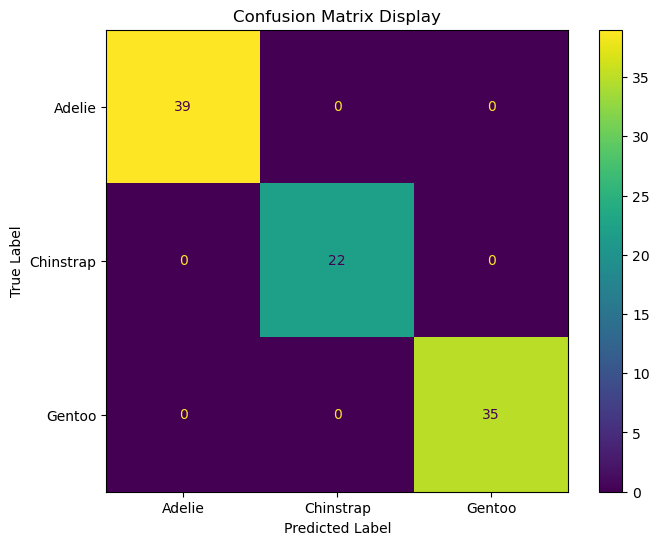

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=['Adelie', 'Chinstrap', 'Gentoo'])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='viridis')
ax.set_title("Confusion Matrix Display")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

In [57]:
mistakes = X_test[y_test != y_test_pred]
mistake_labels = y_test[y_test != y_test_pred]
mistake_preds = y_test_pred[y_test != y_test_pred]

mistake_preds, mistake_labels

(array([], dtype=int64), Series([], Name: Species, dtype: int64))

**The confusion matrix shows perfect classification**
* No misclassifications across the three species (Adelie, Chinstrap, Gentoo)
* Total test set samples:
    * Adelie: 42
    * Chinstrap: 18
    * Gentoo: 38

**Decision Regions**

In [60]:
def plot_regions(c, X, y, group):
    '''
    Visualizes decision regions of a classifier of 2D data, which is why Island will have to be grouped later on; this function fits the classifier to the data, predicts class labels, and plots the decisions and the original points

    Parameters: 
    - c: classifier
    - X: pandas df with predictor columns
    - Y: array of target y values
    - group: the dataframe that we are plotting on (used to identify island) 
    '''
    c.fit(X, y)

    x0 = X["Culmen Length (mm)"]
    x1 = X["Culmen Depth (mm)"]

    grid_x = np.linspace(x0.min(), x0.max(), 501) 
    grid_y = np.linspace(x1.min(), x1.max(), 501) 

    xx, yy = np.meshgrid(grid_x, grid_y)

    XX = xx.ravel()
    YY = yy.ravel()
    
    p = c.predict(np.c_[XX, YY])
    p = p.reshape(xx.shape)

    # Create the plot
    fig, ax = plt.subplots(1)
    
    # Plot decision regions with transparency
    unique_species = np.unique(y)
    for species in unique_species:
        # Get a mask for the current species in the decision boundary
        species_mask = (p == species)
        # Plot the decision region for this species
        ax.contourf(xx, yy, species_mask, levels=[0.5, 1.5], colors=[plt.cm.jet(unique_species.tolist().index(species)/len(unique_species))], alpha=0.2)
    
    # Scatter plot of actual data points
    scatter = ax.scatter(x0, x1, c=y, cmap="jet", label=unique_species)

    # Add legend
    legend1 = ax.legend(scatter.legend_elements()[0], unique_species, title="Species", loc="best")
    ax.add_artist(legend1)

    # Set island name as title
    if group['Island'].iloc[0] == 0:
        title = 'Biscoe'
    elif group['Island'].iloc[0] == 1:
        title = 'Dream'
    else:
        title = 'Torgersen'
        
    ax.set(xlabel="Culmen Length (mm)", ylabel="Culmen Depth (mm)", title=title)

Skipping Island 2: only one class present.


/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/var/folders/6h/kd86xz3j3nn90dk4c0gz2mf40000gn/T/ipykernel_11817/635865188.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_train.groupby('Island').apply(plot_island)


""


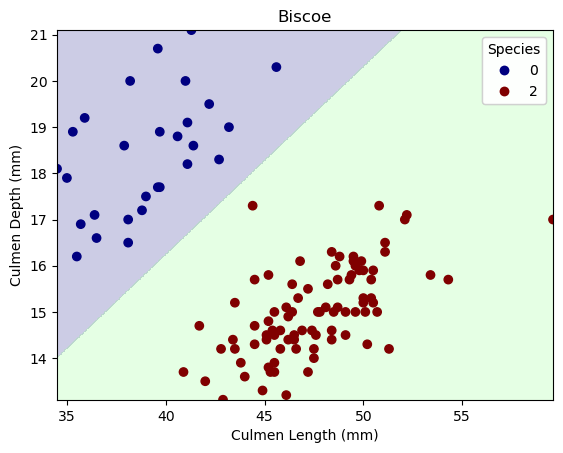

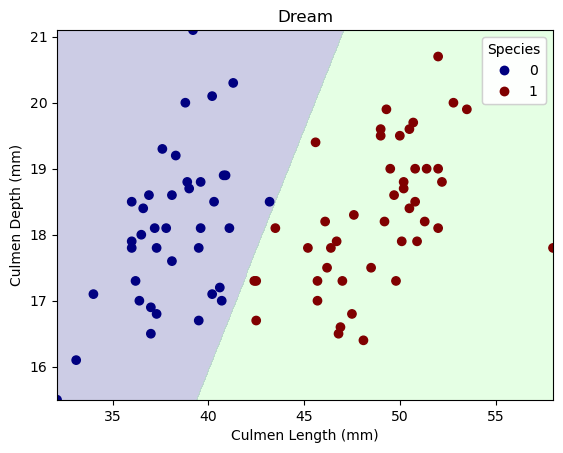

In [66]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=50, max_iter=10000)

def plot_island(group):
    X_group = group[["Culmen Length (mm)", "Culmen Depth (mm)"]]
    y_group = group["Species"]
    
    if y_group.nunique() < 2:
        print(f"Skipping Island {group['Island'].iloc[0]}: only one class present.")
        return
    
    plot_regions(LR, X_group, y_group, group)

data_train = pd.concat([X_train, y_train], axis=1)
data_train.groupby('Island').apply(plot_island)

# Species: 0-Adelie,  1-Chinstrap,  2-Gentoo

Specification: 0-Adelie,  1-Chinstrap,  2-Gentoo

**Decision Region:**
* While there are three islands, only two plots are shown because only one species exists in the third island
* So an error occurs because logistic regression is a classification algorithm that requires at least two different classes to create a meaningful decision boundary. If an island group contains penguins of only one species, the algorithm cannot train a model.
* All species fit within its own regions, confirming the accuracy score of 1.0

**Overall Performance of the logistic regression model:**
* The model shows extremely high accuracy across different validation strategies
* The selected features (Island, Culmen Length, Culmen Depth) provide excellent discrimination between penguin species
* The perfect classification suggests very distinct physical characteristics between species

**Potential Limitations**
* Extremely high accuracy might indicate potential overfitting
* Small dataset size (231 training samples)

------------------------------------------------------

### KMNeighbors Classifier Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train1 = X_train.copy().drop(["Flipper Length (mm)", "Body Mass (g)", "Sex"], axis = 1)

# Find the optimal n_neighbors
n_neighbors_range = range(1, 21) 
mean_scores = [] 
for n in n_neighbors_range:
    nn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(nn, X_train1, y_train, cv=10)
    mean_scores.append(scores.mean()) 
best_n = n_neighbors_range[mean_scores.index(max(mean_scores))]
best_score = max(mean_scores)
best_n
#Best_n is 3 (we will use this for our model)

#Actual Model with n_neighbors = 3
nn = KNeighborsClassifier(n_neighbors=3)
nn.fit(X_train1,y_train)
print(nn.score(X_train1,y_train))
#Score on training data is approximately 98.6% 

#Cross Validation
scores = cross_val_score(nn, X_train1, y_train, cv=10)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
#Cross validation scores is on average 98.7%

In [ ]:
X_test1 = X_test.copy().drop(["Flipper Length (mm)", "Body Mass (g)", "Sex"], axis = 1) #drop proper columbs
y_test_pred = nn.predict(X_test1) 

from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_test_pred)
print(c)
#Confusion Matrix is quite good - only 2 incorrect

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)
#Accuracy Score is approximately 99%

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=["Adelie", "Chinstrap", "Gentoo"])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix Display")
plt.show()

1 confusion on Adelie, and 1 confusion on Chinstrap

In [ ]:
mistakes = X_test1[y_test != y_test_pred]
mistake_labels = y_test[y_test != y_test_pred]
mistake_preds = y_test_pred[y_test != y_test_pred]
print(mistakes)
#Mistakes were only falsely predicted in rows 182, 43

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_regions(c, X, y): 
    '''
    Visualizes decision regions of a classifier of 2D data, which is why Island will have to be grouped later on; this function fits the classifier to the data, predicts class labels, and plots the decisions and the original points

    Parameters: 
    - c: classifier
    - X: pandas df with predictor columns
    - Y: array of target y values
    '''
    c.fit(X,y)
    x0 = X["Culmen Length (mm)"]
    x1 = X["Culmen Depth (mm)"]
    grid_x = np.linspace(x0.min(), x0.max(), 501)
    grid_y = np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    XX = xx.ravel()
    YY = yy.ravel()
    p = c.predict(np.c_[XX,YY])
    p = p.reshape(xx.shape)
    fig,ax = plt.subplots(1, figsize=(8,6))
    ax.contourf(xx,yy,p,cmap = "jet", alpha = 0.2)
    ax.scatter (x0, x1, c=y, cmap = "jet", edgecolor = "k")
    ax.set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)")
    plt.title(f"Decision Regions for {type(c).__name__}")
    plt.show()

def plot_island_nn(nn, group): 
    '''
    Plots decision boundaries  in 2D for nearest neighbor classifier using the data provided (penguins)

    Parameters: 
    - nn: sklearn.neighbors.KNeighborsClassifier
    - group: pandas data frame with Culmen Length, Depth and Species columns
    '''
    scaler = StandardScaler()
    X_group = group[["Culmen Length (mm)", "Culmen Depth (mm)"]]
    X_group_scaled = scaler.fit_transform(X_group)
    y_group = group["Species"]
    plot_regions(nn, pd.DataFrame(X_group_scaled, columns = X_group.columns), y_group)

data_train_nn = pd.concat([X_train, pd.Series(y_train, name="Species")], axis=1)
data_train_nn.groupby("Island").apply(lambda group: plot_island_nn(nn, group))

Specification: 
0 - Adelia, 1 - Chinstrap, 2 - Gentoo 

Confusion Matrix: This shows almost perfect classification, with two incorrectly predicted from total sample sizes of Adelie 42, Chinstrap 18, and Gentoo 38.

**Decision Region:** 
* The first plot demonstrates the decision region for the Biscoe Island between Adelie and Gentoo. 
* The second plot demonstrates the decision region for the Dream Island between Adelie and Chinstrap. 
* The third plot demonstrates the Decision Region for the Torgenson Island, which only has Adelie species, which is demonstrated here. 

**Overall Performance of the KNeighborsClassifier Model:**
* The model demonstrates relatively high accuracy through cross-validation and the confusion matrix. There were two mistakes on the unseen test data as although the model had a score of approximately 99% on the training data, it did not perfectly predict test data. This is a positive finding as it shows that the data fit to the training data. 
* The selected features that were good predictors were Island, Culmen Length, and Culmen Depth. 

-------------------------------------------------------

### Random Forrest

In [ ]:
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Hyperparameter tuning for Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10]}

# Fit Random Forest model using 'Island' instead of 'Sex'
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf_model.fit(X_train[['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']], y_train)

# Best parameters and cross-validation score
print("Random Forest best parameters:", rf_model.best_params_)
print("Random Forest CV score:", rf_model.best_score_)

# Evaluate on test set
y_pred_rf = rf_model.predict(X_test[['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']])
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", rf_accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='viridis')
plt.title("Random Forest Confusion Matrix (Using Island)")
plt.show()


**Random Forest Model Disucssion:**
Cross-Validation (CV) Score: 0.983
The high CV score indicates that the model generalizes well across the training splits, showing consistency in performance.
Test Accuracy: 0.979
The near-perfect accuracy on the unseen test set reflects the model’s robustness and its ability to effectively learn the patterns in the data.
The Random Forest model achieves excellent generalization and accuracy with carefully tuned hyperparameters. The minimal difference between the CV score (0.983) and test accuracy (0.979) suggests low overfitting and strong performance on unseen data. This makes it a reliable model for predicting penguin species.

In [ ]:
#Decision region

def plot_regions(c, X, y):
    '''
    Visualizes decision regions of a classifier of 2D data, which is why Island will have to be grouped later on; this function fits the classifier to the data, predicts class labels, and plots the decisions and the original points

    Parameters: 
    - c: classifier
    - X: pandas df with predictor columns
    - Y: array of target y values
    '''
    # Fit the classifier
    c.fit(X, y)
    
    # Generate a grid for predictions
    x0 = X["Culmen Length (mm)"]
    x1 = X["Culmen Depth (mm)"]
    grid_x = np.linspace(x0.min(), x0.max(), 501)
    grid_y = np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    XX = xx.ravel()
    YY = yy.ravel()
    
    # Create a DataFrame for prediction, preserving feature names
    grid_data = pd.DataFrame({
        "Culmen Length (mm)": XX,
        "Culmen Depth (mm)": YY
    })
    
    # Predict on the grid
    p = c.predict(grid_data)
    p = p.reshape(xx.shape)
    
    # Plot the decision regions
    fig, ax = plt.subplots(1, figsize=(8, 6))
    ax.contourf(xx, yy, p, cmap="jet", alpha=0.2)
    ax.scatter(x0, x1, c=y, cmap="jet", edgecolor="k")
    ax.set(xlabel="Culmen Length (mm)", ylabel="Culmen Depth (mm)")
    plt.title(f"Decision Regions for {type(c).__name__}")
    plt.show()


def plot_island(model, group):
    '''
    Plots the decision regions for a given model using a subset of data grouped by an island.

    Parameters:
    -----------
    model : estimator object
        A trained machine learning model that implements the `fit` and `predict` methods.
    group : DataFrame
        A pandas DataFrame containing data for a specific island. It must include:
        - "Culmen Length (mm)" (float): Quantitative feature 1.
        - "Culmen Depth (mm)" (float): Quantitative feature 2.
        - "Species" (categorical): Target labels for the species classification.

    Returns:
    --------
    None
        Displays a plot showing decision regions created by the model for the given island group.
    '''
    X_group = group[["Culmen Length (mm)", "Culmen Depth (mm)"]]
    y_group = group["Species"]
    plot_regions(model, X_group, y_group)


# Add species column to X_train for grouping
data_train_rf = pd.concat([X_train, y_train.rename("Species")], axis=1)

# Visualize decision regions by Island
print("Random Forest Decision Regions by Island:")
data_train_rf.groupby("Island").apply(lambda group: plot_island(rf_model.best_estimator_, group))


**Decision Region:** The Random Forest creates decision regions with a slightly segmented and rectangular structure due to its tree-based splits.  On Torgersen Island, the regions are straightforward, dominated by a single species (Adelie penguins). On Dream and Biscoe Islands, the regions become more detailed to separate multiple species effectively.

--------------------

### Neural Networks Model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


# Initialize the scaler
scaler = StandardScaler()

# Scale the data using Island
X_train_scaled = scaler.fit_transform(X_train[['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']])
X_test_scaled = scaler.transform(X_test[['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']])

# Hyperparameter tuning for Neural Network
nn_params = {
    'hidden_layer_sizes': [(10,), (50,), (100,)], 
    'alpha': [0.0001, 0.001, 0.01], 
    'max_iter': [1000],  # Increased max_iter
    'learning_rate_init': [0.001, 0.01]  # Learning rate adjustments
}

# Perform Grid Search
nn_model = GridSearchCV(MLPClassifier(random_state=42), nn_params, cv=5)
nn_model.fit(X_train_scaled, y_train)

# Best parameters and cross-validation score
print("Neural Network best parameters:", nn_model.best_params_)
print("Neural Network CV score:", nn_model.best_score_)

# Evaluate on test set
y_pred_nn = nn_model.predict(X_test_scaled)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print("Neural Network Test Accuracy:", nn_accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nn_model.classes_)
disp.plot(cmap='viridis')
plt.title("Neural Network Confusion Matrix (Using Island)")
plt.show()


**Neural Network Model Discussion:**
Cross-Validation Score: 0.983
This high CV score indicates the model generalizes well across training splits.
Test Accuracy: 1.0
Perfect accuracy on the unseen test set highlights the model’s ability to learn the data patterns effectively. The Neural Network achieves near-perfect generalization and test performance. The high CV score combined with 100% test accuracy suggests the model captures the relationship between the features and species with exceptional precision. 

In [ ]:
#Decision Regions 

# Neural Network requires scaled data
def plot_island_nn(nn_model, group):
    """
    Plots the decision regions for a Neural Network model using scaled features 
    for a specific island group.

    Parameters:
    -----------
    nn_model : GridSearchCV or estimator object
        A trained neural network model, typically returned by GridSearchCV. 
        The `best_estimator_` attribute is used to access the final fitted model.
    group : DataFrame
        A pandas DataFrame containing data for a specific island. It must include:
        - "Culmen Length (mm)" (float): Quantitative feature 1.
        - "Culmen Depth (mm)" (float): Quantitative feature 2.
        - "Species" (categorical): Target labels for the species classification.

    Returns:
    --------
    None
        Displays a plot showing decision regions created by the neural network 
        for the given island group.

    """
    # Scale features for Neural Network
    scaler = StandardScaler()
    X_group = group[["Culmen Length (mm)", "Culmen Depth (mm)"]]
    X_group_scaled = scaler.fit_transform(X_group)
    y_group = group["Species"]
    
    # Plot decision regions
    plot_regions(nn_model.best_estimator_, pd.DataFrame(X_group_scaled, columns=X_group.columns), y_group)

# Add species column to X_train for grouping
data_train_nn = pd.concat([X_train, y_train.rename("Species")], axis=1)

# Visualize decision regions by Island
print("Neural Network Decision Regions by Island:")
data_train_nn.groupby("Island").apply(lambda group: plot_island_nn(nn_model, group))

**Decision Region:** The Neural Network produces smooth and adaptable decision boundaries, reflecting its ability to capture non-linear relationships between Culmen Length and Culmen Depth. On islands like Torgersen, where only Adelie penguins are present, the decision regions are uniform and simple. For islands like Dream and Biscoe, where multiple species coexist, the boundaries are more intricate, successfully separating species despite overlap. 

------------------

## Final Discussion

**Overall performace:**
* All models have high accuracy scores (above .95 accuracy), which indicates that the selected features (Island, Culmen Length, Culmen Depth) provide excellent discrimination between penguin species
* The logistic regression and neural network model provide the best predictions for species on unseen data:
  * Logistic regression scored 1.0 accuracy on test set
  * Neural network scored 1.0 accuracy on test set
  * Perfect diagonal matrices on both models

**Improvements:**
* Many rows contained missing values in key features like Culmen Length or Culmen Depth. Imputing these values using statistical methods or collecting more complete data would enhance the model's reliability.
* Increasing the sample size would improve the robustness of the models, especially for species or islands with fewer observations. This could reduce the risk of overfitting.

*TLDR:* Overall, we recommend the feature set ( island, Culmen Depth, Culmen Length) with the model Neural Network or Logistical Regression. 